# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** Yann Arif
**Dataset:** Solar Flare
**Date:** 10/02/2025

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---


## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [25]:
# Load your dataset here
# Replace this with your actual data loading code
# Example for Heart Disease dataset:
# df = pd.read_csv('heart_disease.csv')
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
HD = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
df=HD.data.original
print(type(df))
# variable information 
print(df.head()) 



<class 'pandas.core.frame.DataFrame'>
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.


In [26]:
# Basic dataset information
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nData types:")
print(df.dtypes)
print(f"\nMissing values:")
print(df.isnull().sum())
print(f"\nBasic statistics:")
df.describe()


=== DATASET OVERVIEW ===
Shape: (303, 14)

Data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
num           int64
dtype: object

Missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

Basic statistics:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [27]:
# Target variable analysis
print("=== TARGET VARIABLE ===")
target_counts = df['target'].value_counts()
print(f"Target distribution:")
print(target_counts)

# Visualize target distribution
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
target_counts.plot(kind='bar')
plt.title('Target Distribution')
plt.xlabel('Target')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Target Distribution (%)')

plt.tight_layout()
plt.show()


=== TARGET VARIABLE ===


KeyError: 'target'

=== NUMERICAL VARIABLES ===
Numerical columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']


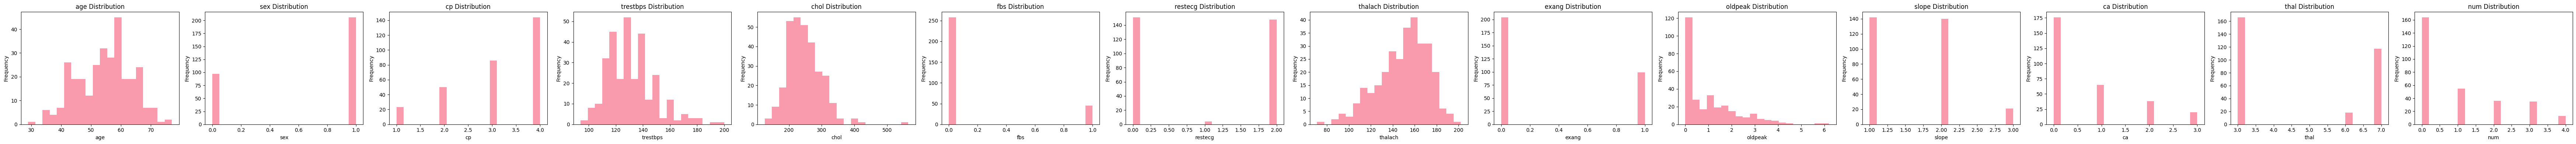

In [28]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ===")
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {list(numerical_cols)}")

# Create histograms for numerical variables
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(5*len(numerical_cols), 4))
if len(numerical_cols) == 1:
    axes = [axes]

for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, alpha=0.7)
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [29]:
# Categorical variables analysis
print("=== CATEGORICAL VARIABLES ===")
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")

for col in categorical_cols:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())
    
    # Create bar plot
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


=== CATEGORICAL VARIABLES ===
Categorical columns: []


=== CORRELATION ANALYSIS ===


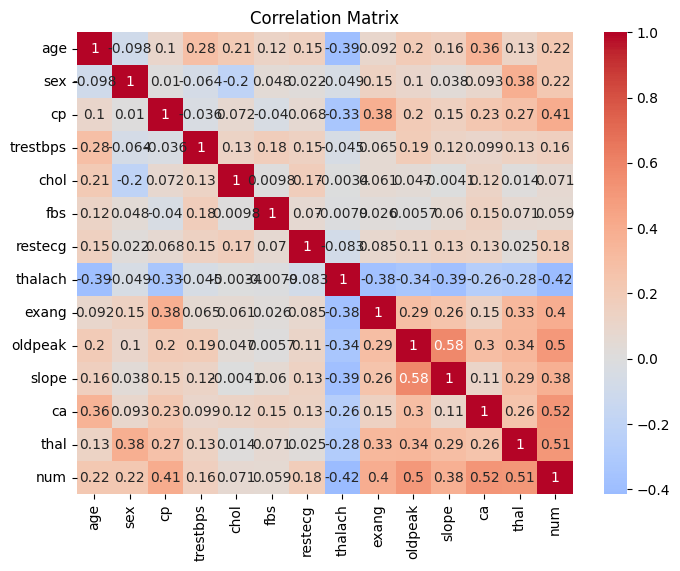

In [30]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Show correlations with target variable
if 'target' in df.columns:
    target_correlations = correlation_matrix['target'].sort_values(ascending=False)
    print("\nCorrelations with target variable:")
    print(target_correlations)


=== RELATIONSHIPS WITH TARGET ===


KeyError: 'target'

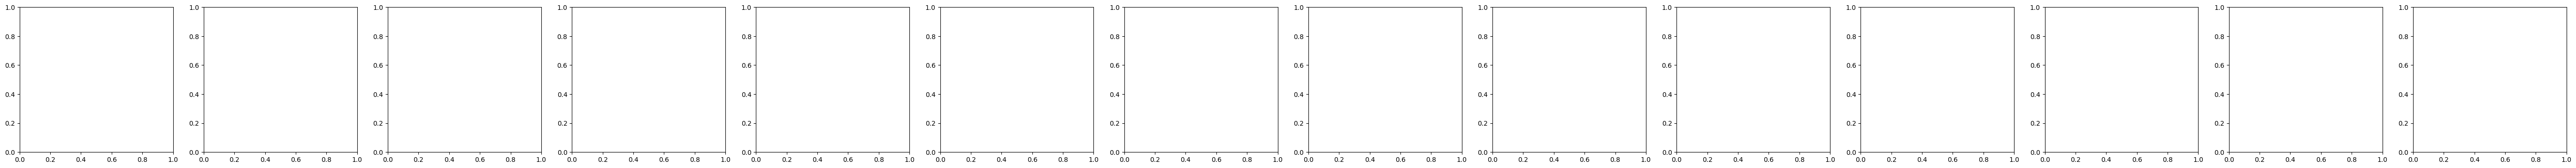

In [31]:
# Relationship between variables and target
print("=== RELATIONSHIPS WITH TARGET ===")

# Box plots for numerical variables vs target
numerical_cols_no_target = [col for col in numerical_cols if col != 'target']

if len(numerical_cols_no_target) > 0:
    fig, axes = plt.subplots(1, len(numerical_cols_no_target), figsize=(5*len(numerical_cols_no_target), 4))
    if len(numerical_cols_no_target) == 1:
        axes = [axes]
    
    for i, col in enumerate(numerical_cols_no_target):
        df.boxplot(column=col, by='target', ax=axes[i])
        axes[i].set_title(f'{col} by Target')
        axes[i].set_xlabel('Target')
        axes[i].set_ylabel(col)
    
    plt.tight_layout()
    plt.show()

# Crosstabs for categorical variables vs target
for col in categorical_cols:
    print(f"\n{col} vs Target:")
    crosstab = pd.crosstab(df[col], df['target'], normalize='index')
    print(crosstab.round(3))


## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: high cholesterol causes vasoconstriction
**H1:** patients with cholesterol levels above the mean+stddev are at higher risk to have cardiovascular complications
- **Null Hypothesis (H0):** There is no link between cholesterol and vascular diameter narrowing
- **Alternative Hypothesis (H1):** High cholesterol increases risk of vascular diameter narrowing
- **Rationale:** Fatty foods are often high in cholesterol and cause buildup in the interior of veins

### Hypothesis 2: ST-depression linked during excercise linked to shape of slope of ST segment during excercise
**H2:** patients with a stronger ST-depression tend to have bigger upslopes in the ST segment
- **Null Hypothesis (H0):** There is no link between ST-depression and ST-segment slope during excercise
- **Alternative Hypothesis (H1):** Patients with a more severe ST-depression exhibit a sharper upslope in the ST-segment during excercise
- **Rationale:** The correlation matrix displays a strong correlation between the two attributes. additionally, it makes sense that if the curve goes deeper into the negative quadrant, it needs to take a sharper slope upwards in order to return to the neutral state

### Hypothesis 3: [Your third hypothesis - optional]
**H3:** [State your hypothesis]
- **Null Hypothesis (H0):** [State null hypothesis]
- **Alternative Hypothesis (H1):** [State alternative hypothesis]
- **Rationale:** [Explain why you think this relationship exists]

---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis


### Testing Hypothesis 1: [Your first hypothesis]

**Test Choice:** t-test
- **Why appropriate:** t-test fits the experiment, which aims to evaluate the average frequencies of heart disease among people with higher and lower cholesterol


In [53]:
# Hypothesis 1 Testing
print("=== TESTING HYPOTHESIS 1 ===")

# Your code for testing hypothesis 1 here
# Example structure:
# 1. Prepare your data
# 2. Check assumptions if needed
# 3. Perform the statistical test
# 4. Interpret results

# Example for t-test:
# group1 = df[df['condition'] == 0]['variable']
# group2 = df[df['condition'] == 1]['variable']
# t_stat, p_value = stats.ttest_ind(group1, group2)
# print(f"t-statistic: {t_stat:.4f}")
# print(f"p-value: {p_value:.4f}")
# 
# if p_value < 0.05:
#     print("Reject H0: There is a significant difference")
# else:
#     print("Fail to reject H0: No significant difference")


threshhold=df['chol'].mean() + df['chol'].std()
below=[row['num']for _,row in df.iterrows() if row['chol']<=threshhold]
above=[row['num']for _,row in df.iterrows() if row['chol']>threshhold]
t_statistic, p_value = stats.ttest_ind(below, above,equal_var=True)
print(p_value)
if p_value < 0.05:
    print("Reject H0: Variables are significantly associated")
else:
    print("Fail to reject H0: No significant association")


=== TESTING HYPOTHESIS 1 ===
0.3703904184471971
Fail to reject H0: No significant association


### Testing Hypothesis 2: slope/oldpeak correlation

**Test Choice:** correlation
- **Why appropriate:** these two attributes likely display a linear relationship. additionally, the correlation matrix is what provided the intuition for this hypothesis


In [60]:
# Hypothesis 2 Testing
print("=== TESTING HYPOTHESIS 2 ===")

# Your code for testing hypothesis 2 here
# Example for chi-square test:
# contingency_table = pd.crosstab(df['var1'], df['var2'])
# chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
# print(f"Chi-square statistic: {chi2:.4f}")
# print(f"p-value: {p_value:.4f}")
# 
# if p_value < 0.05:
#     print("Reject H0: Variables are significantly associated")
# else:
#     print("Fail to reject H0: No significant association")
cc,p_value = stats.pearsonr(df['oldpeak'],df['slope'])
print(p_value)
if p_value < 0.05:
    print("Reject H0: Variables are significantly associated")
else:
    print("Fail to reject H0: No significant association")


=== TESTING HYPOTHESIS 2 ===
2.3715800275350765e-28
Reject H0: Variables are significantly associated


## 5. Summary and Conclusions

### Key Findings from EDA:
1. Often integer types are used to classify traits, which can make it difficult to form hypotheses from graphs
2. As is intuitive with humans, a lot of their biometric data followed normal distributions, which led me to try finding patterns in patients who fell outside the stddev of the distributions, to no avail. 
3. The lack of a relationship in Hypothesis 1 surprised me

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | Cholesterol->Vasoconstriction | 0.37| Not | High cholesterol does not provide any information of vessel diameter |
| **H2** | ST-drop -> ST-slope| 2.37e-28 | Significant | a higher ST-depression leads to a sharper slope in the ST-segment during excercise |


### Key Insights:
- They provide information that allows the interpretation of biometric data to infer the state of a patient's cardiovascular health, both from vital checks and ECG readings
- They allow links and correlations to be drawn to predict the long term health of patients from short-term indicators, which can allow for medical studies and advice to be given
- Consider sample sizes, data not present in this set, statistical outliers, and that samples were drawn from a set which accurately represents the general population

### Future Research:
- Someone with a better understanding of the data in this set would be able to form more involved and educated hypotheses which could lead to lesser-known discoveries/results
- More target variables would allow to better interpret what long-term effects certain features have

---

**Note:** Remember to replace the sample data with your actual dataset and fill in all the template sections with your own analysis and interpretations.


In [61]:
# Final summary
print("=== ANALYSIS COMPLETE ===")
print(f"Dataset analyzed: Heart Disease Dataset")
print(f"Sample size: {len(df)} observations")
print(f"Number of features: {df.shape[1]-1} (excluding target)")
print(f"\nAnalysis completed successfully!")
print("\nRemember to:")
print("1. Replace sample data with your actual dataset")
print("2. Fill in all template sections with your analysis")
print("3. Provide clear explanations for your choices")
print("4. Interpret your results meaningfully")


=== ANALYSIS COMPLETE ===
Dataset analyzed: Heart Disease Dataset
Sample size: 303 observations
Number of features: 13 (excluding target)

Analysis completed successfully!

Remember to:
1. Replace sample data with your actual dataset
2. Fill in all template sections with your analysis
3. Provide clear explanations for your choices
4. Interpret your results meaningfully
